In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Melbourne_housing_FULL.csv")

<ipython-input-2-01f42b30844e>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Melbourne_housing_FULL.csv")


In [3]:
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Method         34857 non-null  object        
 5   SellerG        34857 non-null  object        
 6   Date           34857 non-null  datetime64[ns]
 7   Distance       34856 non-null  float64       
 8   Postcode       34856 non-null  float64       
 9   Bedroom        26640 non-null  float64       
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13760 non-null  object        
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

In [6]:
df.shape

(34857, 22)

In [7]:
# Convert columns to numeric, forcing errors to NaN for invalid entries
numeric_cols = ['Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Coerce non-numeric values to NaN
df['BuildingArea'].astype(float)
# Now handle missing values by filling with median
df['Bedroom'] = df['Bedroom'].fillna(df['Bedroom'].median())
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
df['Car'] = df['Car'].fillna(df['Car'].median())
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].median())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())
df['Price'] = df['Price'].fillna(df['Price'].median())


In [12]:
# Define thresholds
threshold = 10

# Identify numerical and categorical columns based on nunique
numerical_cols = [col for col in df.columns if df[col].nunique() > threshold]
categorical_cols = [col for col in df.columns if df[col].nunique() <= threshold]

# Output results
print("Numerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)


Numerical Columns:
 ['Suburb', 'Address', 'Rooms', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude', 'Propertycount', 'Price']

Categorical Columns:
 ['Type', 'Method', 'Regionname', 'ParkingArea']


In [15]:
# Drop rows where the non-null count for columns is greater than the threshold
df = df.dropna(subset=[col for col in df.columns if df[col].notnull().sum() > 34500])

In [16]:
# Drop any remaining rows with missing values in crucial columns
df = df.drop(['Latitude', 'Longtitude'], axis=1)
# Check if the missing values have been handled
print(df.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
ParkingArea      0
Price            0
dtype: int64


In [17]:
df.shape

(34854, 20)

In [18]:
numerical_cols = [col for col in df.columns
                  if df[col].nunique() > 10
                  and df[col].dtype.kind in ['i', 'f']]

In [20]:
print("Numerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)


Numerical Columns:
 ['Rooms', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount', 'Price']

Categorical Columns:
 ['Type', 'Method', 'Regionname', 'ParkingArea']


# Univariate Analysis

Numerical Variables
Descriptive Statistics: This method summarizes key statistical metrics like mean, median, mode, standard deviation, minimum, maximum, and percentiles.

Histogram: A histogram visually represents the distribution of the numerical data by showing the frequency of values within certain ranges (bins).

Categorical Variables
Frequency Count: This method counts the occurrences of each category in the categorical variable to provide insights into its distribution.

Bar Plot: A bar plot visually represents the counts of each category, making it easy to compare the frequency of different categories.

In [21]:
sns.set(style="whitegrid")

In [23]:
numerical_stats = df[numerical_cols].describe()
print("Descriptive Statistics:\n", numerical_stats)


Descriptive Statistics:
               Rooms      Distance      Postcode       Bedroom      Bathroom  \
count  34854.000000  34854.000000  34854.000000  34854.000000  34854.000000   
mean       3.031072     11.185204   3116.065645      3.064698      1.713318   
std        0.969943      6.788983    109.025570      0.858127      0.652777   
min        1.000000      0.000000   3000.000000      0.000000      0.000000   
25%        2.000000      6.400000   3051.000000      3.000000      1.000000   
50%        3.000000     10.300000   3103.000000      3.000000      2.000000   
75%        4.000000     14.000000   3156.000000      3.000000      2.000000   
max       16.000000     48.100000   3978.000000     30.000000     12.000000   

                Car       Landsize  BuildingArea     YearBuilt  Propertycount  \
count  34854.000000   34854.000000       34854.0  34854.000000   34854.000000   
mean       1.796723     569.005652           inf   1967.898462    7572.888306   
std        0.883005 

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


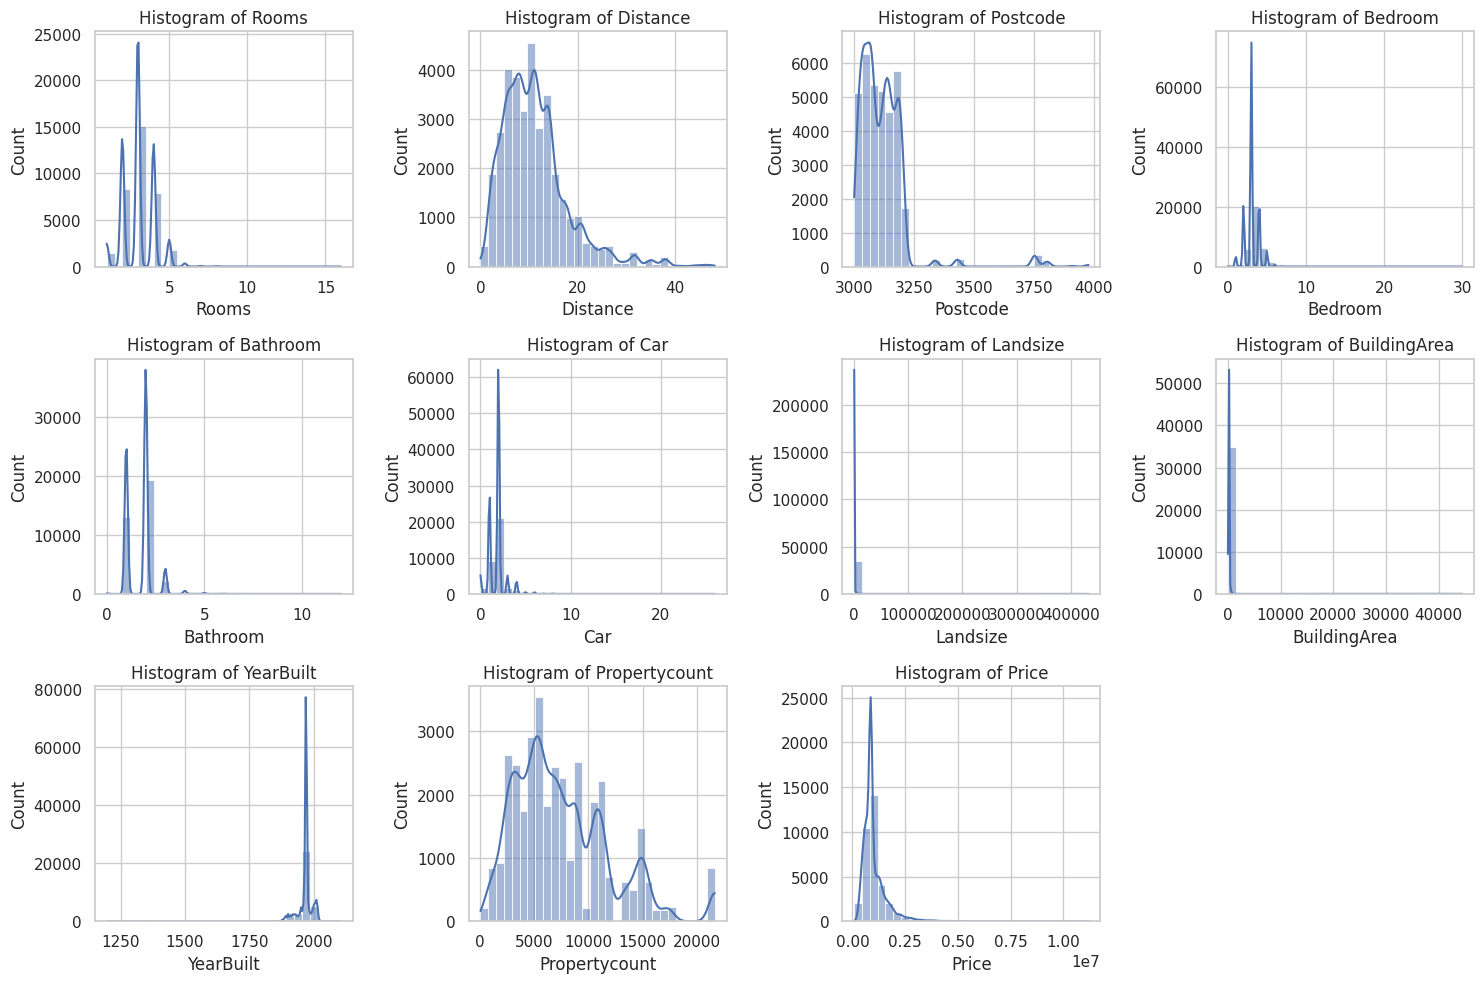

In [24]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # Adjust subplot grid as needed
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Distance and Property count show right skewed distribution
# multimodal propertycount

In [25]:
categorical_counts = {col: df[col].value_counts() for col in categorical_cols}

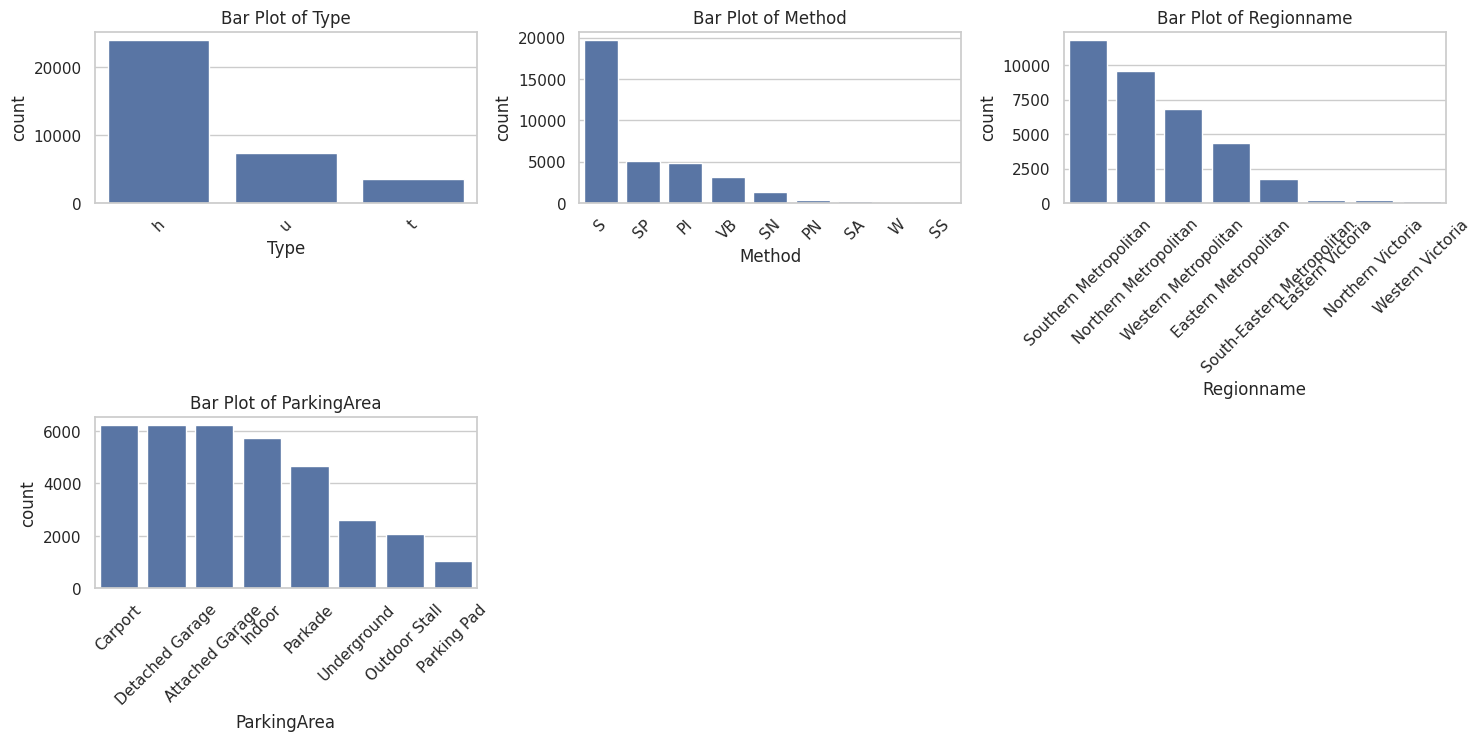

In [26]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust subplot grid as needed
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# htype dominant
# S method more than half used
# highest count in southern metropolitan

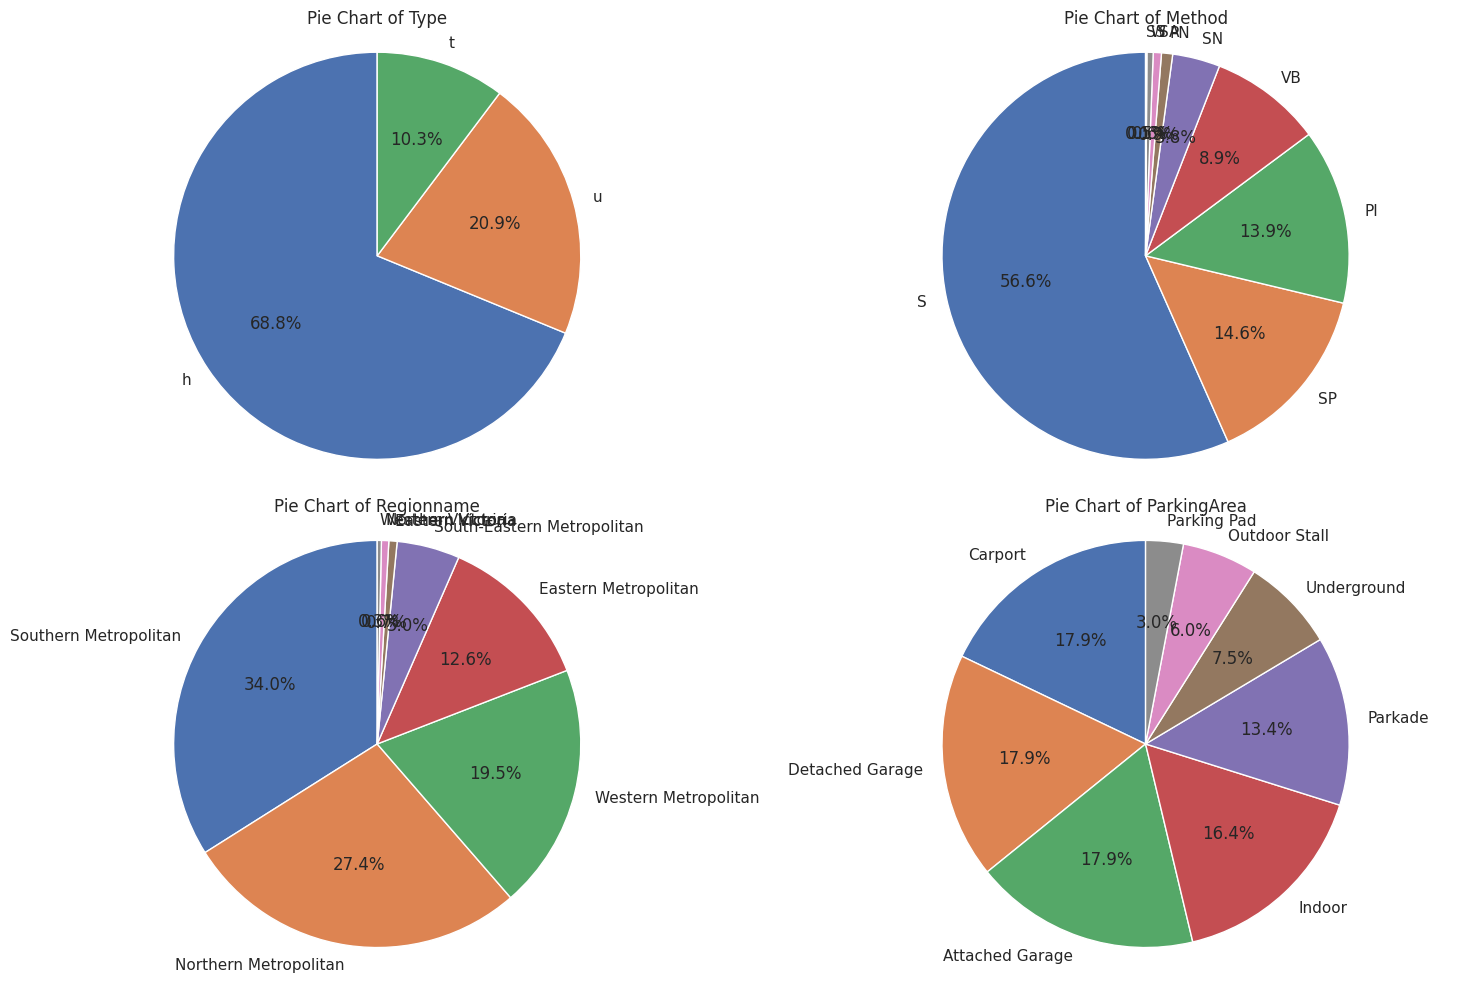

In [49]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)  # Adjust subplot grid as needed
    # Calculate value counts for the column
    value_counts = df[col].value_counts()

    # Create the pie chart
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

# Multivariate Analysis

Scatter Matrix: Create a scatter matrix for the numerical variables.

Scatterplot with Data Points Labeled by Group: Create scatter plots for adjacent numerical variables colored by a categorical variable.

Profile Plot: Plot each numerical variable to show its variation.

Calculating Summary Statistics: Compute summary statistics (mean and standard deviation) for the numerical variables grouped by a categorical variable.

In [32]:
df['BuildingArea'] = df['BuildingArea'].replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN

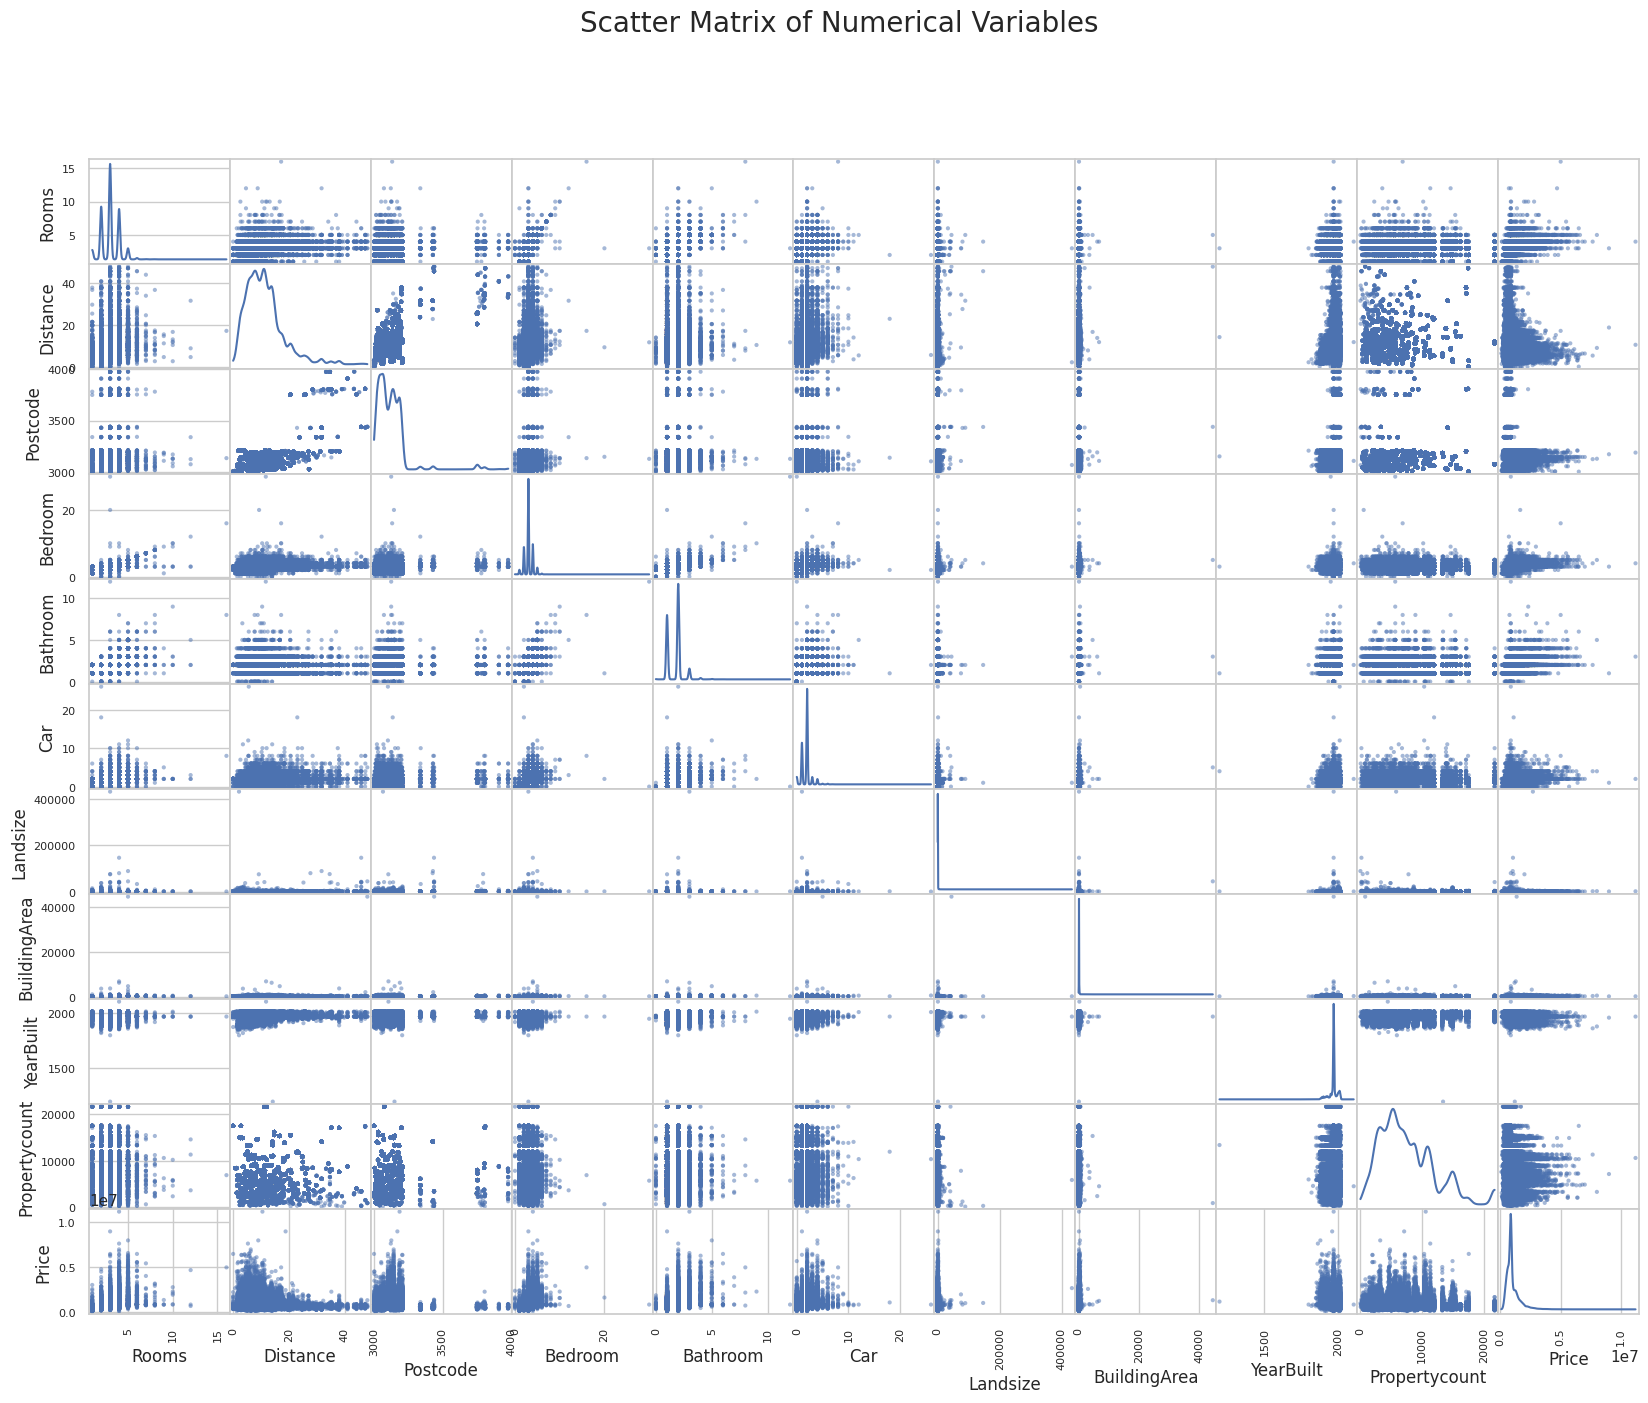

In [33]:
# --- 1. Scatter Matrix ---
pd.plotting.scatter_matrix(df[numerical_cols], diagonal='kde', figsize=(20, 15))
plt.suptitle('Scatter Matrix of Numerical Variables', fontsize=20)
plt.show()

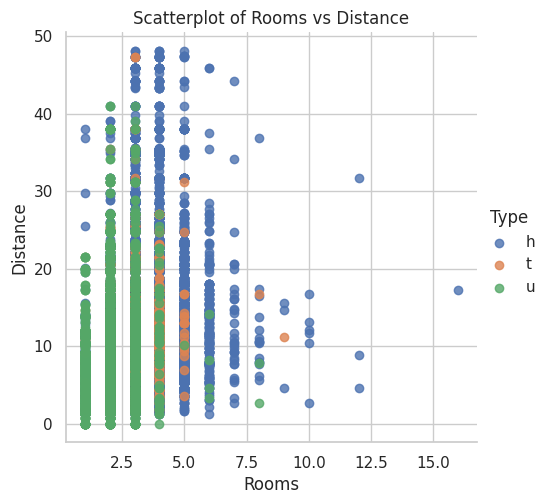

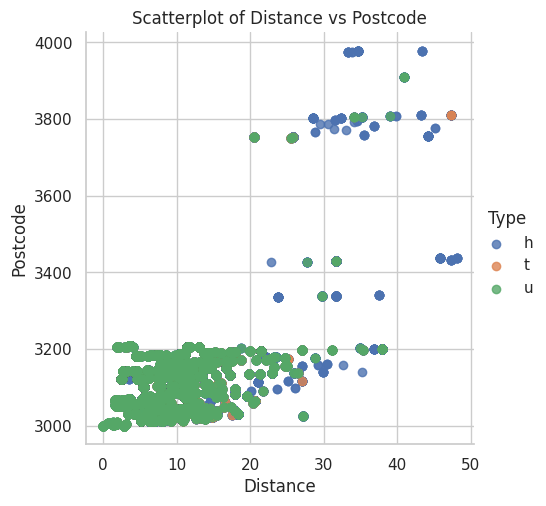

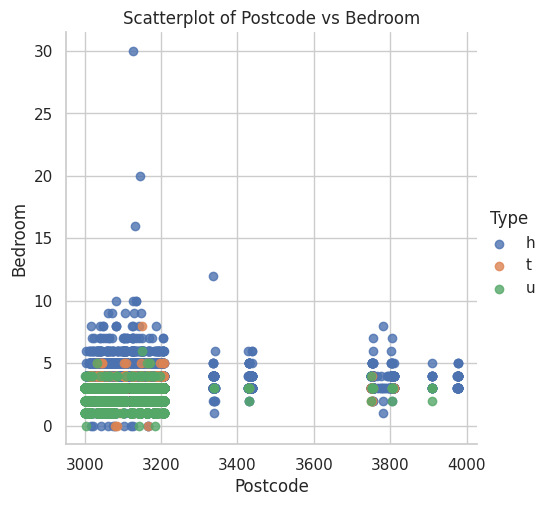

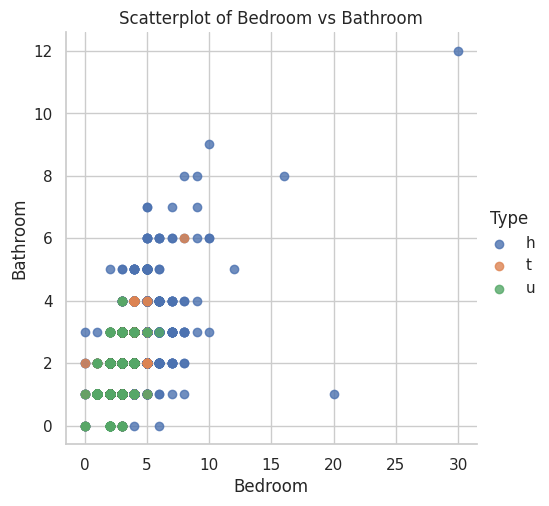

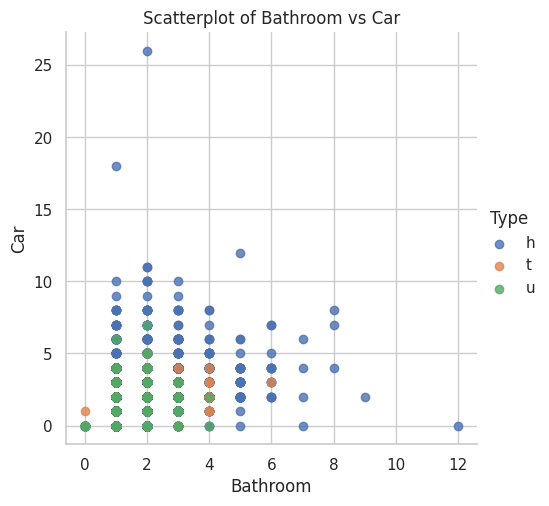

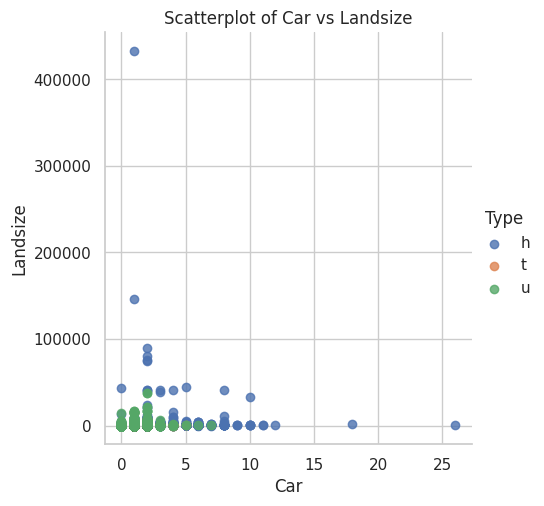

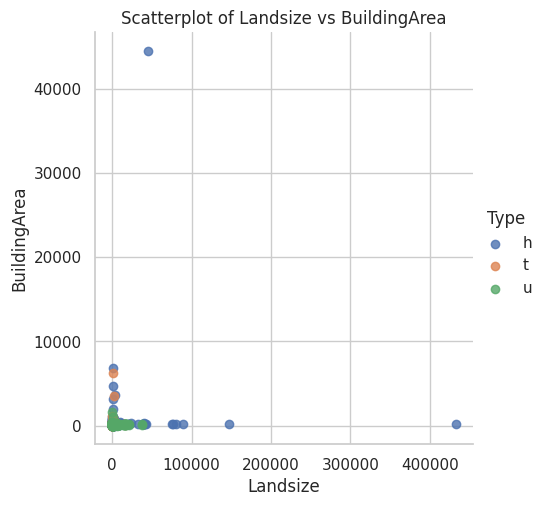

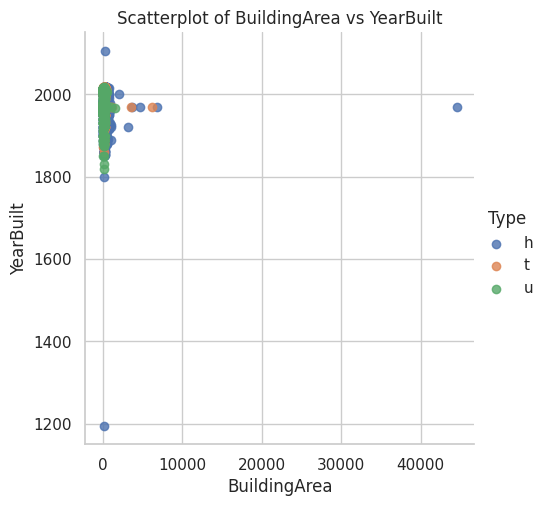

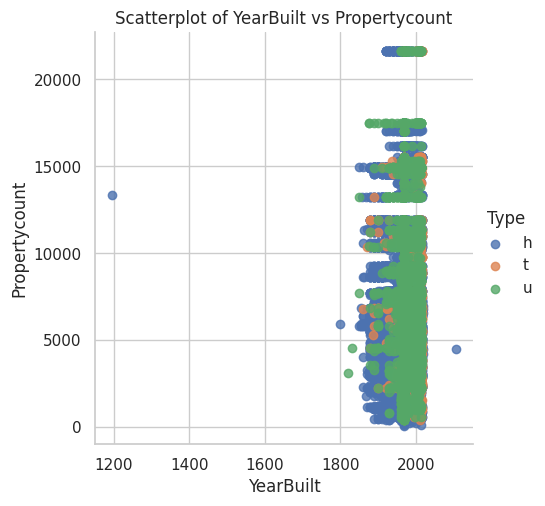

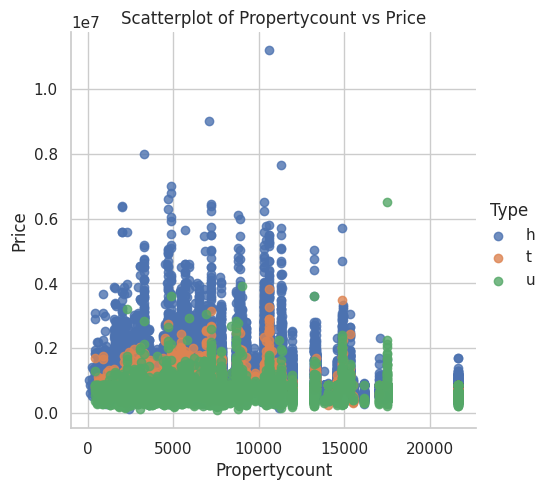

In [35]:
# --- 2. Scatterplots with Data Points Labeled by 'Type' ---
for i in range(len(numerical_cols) - 1):
    sns.lmplot(x=numerical_cols[i],
               y=numerical_cols[i + 1],
               data=df,
               hue='Type',  # Change to a relevant categorical variable
               fit_reg=False)
    plt.title(f'Scatterplot of {numerical_cols[i]} vs {numerical_cols[i + 1]}')
    plt.show()

In [ ]:
'''
General Insights
Average Price Trends:
The overall average price of properties and how it varies across different suburbs.
Any significant fluctuations in prices over time (if time series data is available).

Room Count Statistics:
Average number of rooms, bedrooms, and bathrooms per property.
Distribution of room counts across different property types.

Building Area Insights:
Average building area and its correlation with price. Larger properties tend to command higher prices.
Distribution of building sizes, especially if there are outliers (like extremely large or small buildings).

Distance Analysis:
How property prices change with distance from the city center (CBD). Typically, properties nearer to the CBD are more expensive.
Any patterns in property size and type with respect to distance.

Property Type Comparison:
Differences in prices between various property types (house, unit, townhouse).
Insights into which property types are most prevalent in the dataset.

Method of Sale Impact:
Analysis of different selling methods (e.g., private sale, auction) and their impact on final sale prices.
Recommendations for sellers on the best methods to maximize their sale price.

Seller and Agency Performance:
Comparison of performance across different sellers and agencies. Some may consistently achieve higher sale prices.
'''

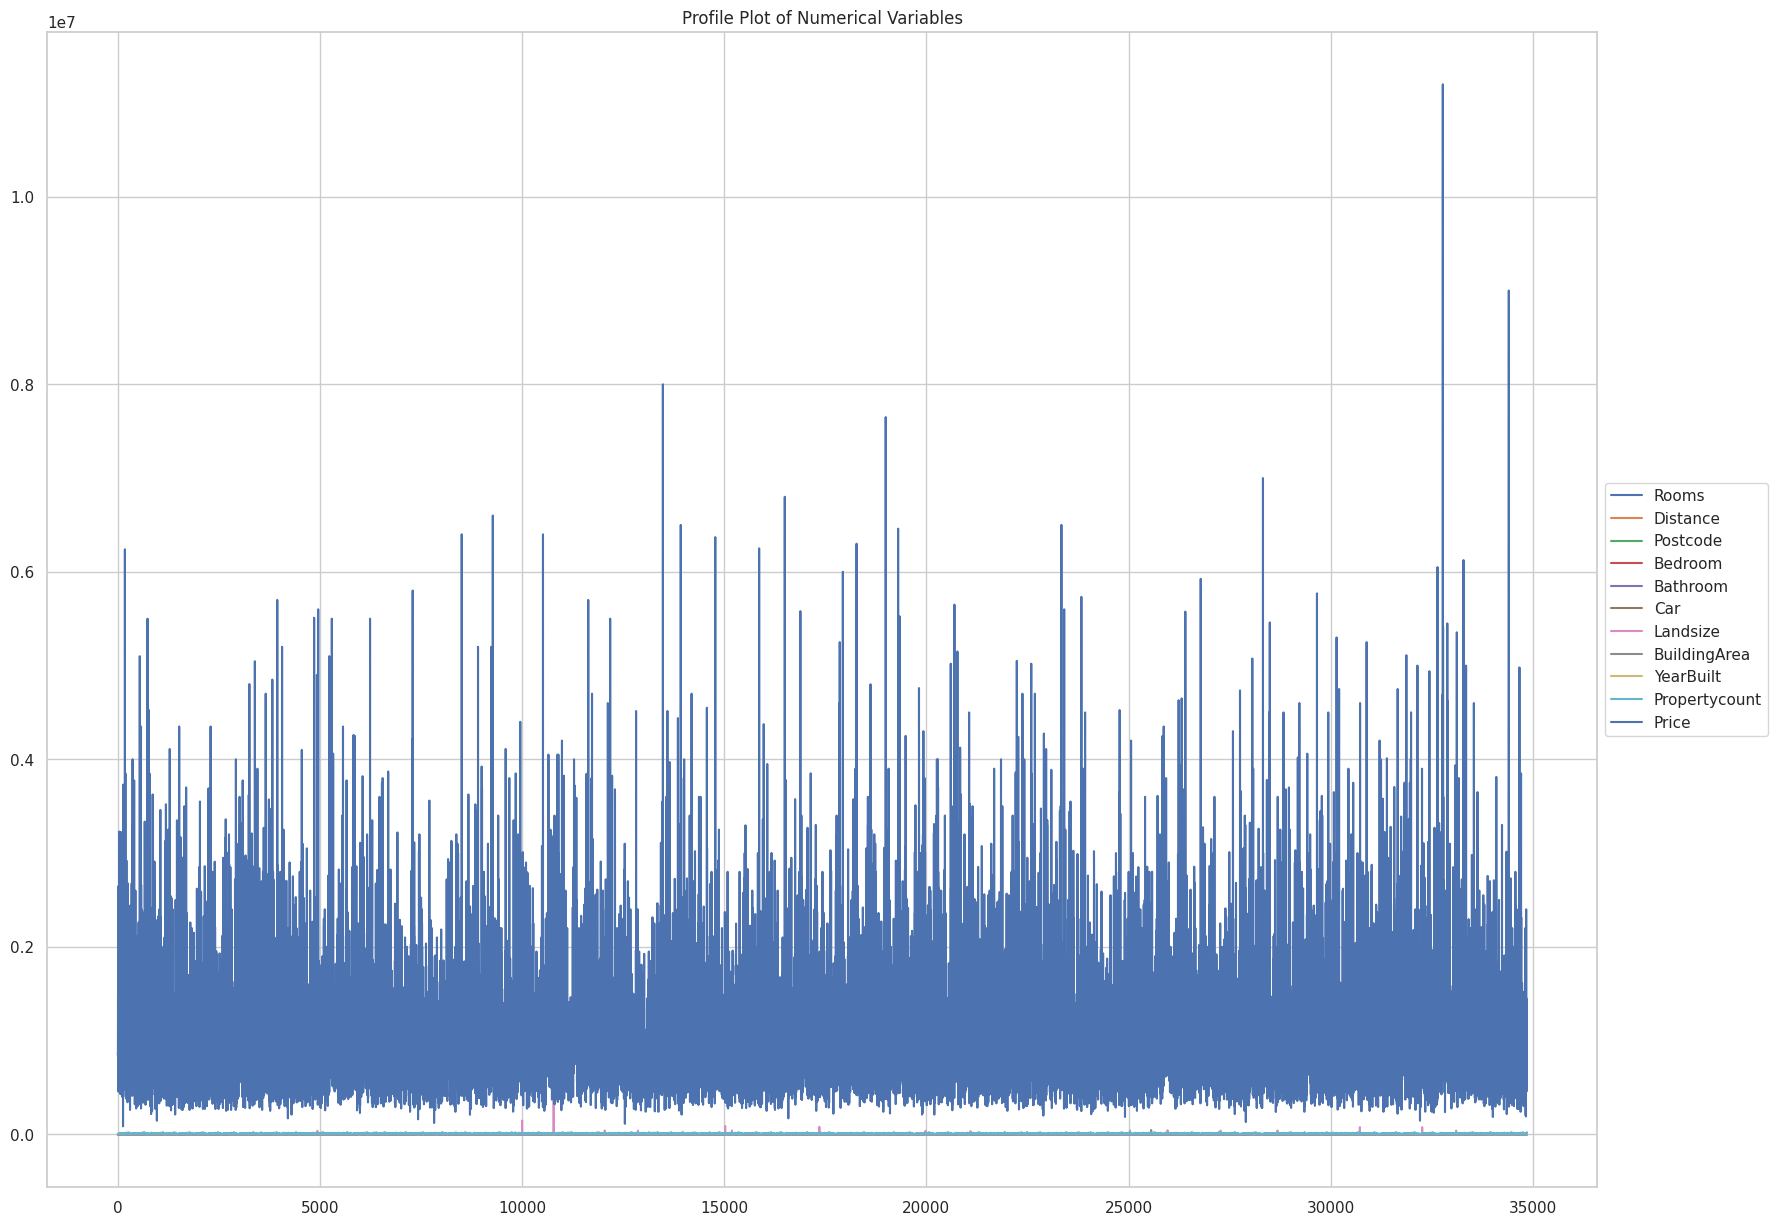

In [37]:
# --- 3. Profile Plot ---
numerical_data = df[numerical_cols]
ax = numerical_data.plot(figsize=(20, 15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Profile Plot of Numerical Variables')
plt.show()

In [38]:
# --- 4. Calculating Summary Statistics for Multivariate Data ---
summary_stats = numerical_data.mean()
print("Means:\n", summary_stats)


Means:
 Rooms            3.031072e+00
Distance         1.118520e+01
Postcode         3.116066e+03
Bedroom          3.064698e+00
Bathroom         1.713318e+00
Car              1.796723e+00
Landsize         5.690057e+02
BuildingArea     1.455656e+02
YearBuilt        1.967898e+03
Propertycount    7.572888e+03
Price            1.010863e+06
dtype: float64


In [40]:
# Means and Variances Per Group
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard Deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample Sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))


In [41]:
# Applying the function to calculate means and standard deviations grouped by 'Type'
printMeanAndSdByGroup(numerical_data, df['Type'])

## Means:


,0
Type,
h,103672.384193
t,84718.449989
u,62543.433471



## Standard Deviations:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Price
Type,,,,,,,,,,,
h,0.862097,7.129072,122.220969,0.833075,0.699055,0.979108,3258.816645,299.270254,26.976916,4385.003328,619886.405567
t,0.701785,4.939225,73.607534,0.518366,0.469535,0.485820,490.338633,121.992685,18.898677,4287.835109,343376.225137
u,0.650997,5.369404,70.323320,0.701791,0.513303,0.584193,1205.817968,37.669013,16.466881,4563.645541,283373.101338



## Sample Sizes:


,0
Type,
h,23978
t,3580
u,7296


Calculate Between-Groups and Within-Groups Variance for a Variable.

Calculate Between-Groups and Within-Groups Covariance for Two Variables.

Calculate Correlations for Multivariate Data using Pearson's correlation coefficient.

Create a Hinton diagram to visualize the correlations.

In [42]:
# Function to calculate Between-groups and Within-groups variance
def between_within_variance(df, group_var, target_var):
    group_means = df.groupby(group_var)[target_var].mean()
    overall_mean = df[target_var].mean()

    # Between-groups variance
    between_var = sum(df[group_var].value_counts() * (group_means - overall_mean)**2) / len(df)

    # Within-groups variance
    within_var = sum(df.groupby(group_var).apply(lambda x: ((x[target_var] - x[target_var].mean())**2).sum())) / len(df)

    return between_var, within_var

# Example usage
between_var, within_var = between_within_variance(df, 'Type', 'Price')
print(f'Between-groups Variance: {between_var}')
print(f'Within-groups Variance: {within_var}')

Between-groups Variance: 33920515683.114693
Within-groups Variance: 293273226128.8158


In [43]:
# Function to calculate Between-groups and Within-groups Covariance for two variables
def between_within_covariance(df, group_var, var1, var2):
    group_means = df.groupby(group_var)[[var1, var2]].mean()
    overall_means = df[[var1, var2]].mean()

    # Between-groups covariance
    between_cov = sum(df[group_var].value_counts() * ((group_means[var1] - overall_means[var1]) * (group_means[var2] - overall_means[var2])))

    # Within-groups covariance
    within_cov = sum(df.groupby(group_var).apply(lambda x: ((x[var1] - x[var1].mean()) * (x[var2] - x[var2].mean())).sum()))

    return between_cov, within_cov

# Example usage for Price and Bedroom
between_cov, within_cov = between_within_covariance(df, 'Type', 'Price', 'Bedroom')
print(f'Between-groups Covariance: {between_cov}')
print(f'Within-groups Covariance: {within_cov}')

Between-groups Covariance: 2296388960.991324
Within-groups Covariance: 3179920972.6319036


In [45]:
# Step 3: Calculate Pearson correlations
correlation_matrix = df[numerical_cols].corr()

# Displaying the correlations
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                   Rooms  Distance  Postcode   Bedroom  Bathroom       Car  \
Rooms          1.000000  0.271481  0.085867  0.823836  0.481592  0.317120   
Distance       0.271481  1.000000  0.481556  0.239958  0.102258  0.204177   
Postcode       0.085867  0.481556  1.000000  0.080763  0.102347  0.058623   
Bedroom        0.823836  0.239958  0.080763  1.000000  0.585423  0.375112   
Bathroom       0.481592  0.102258  0.102347  0.585423  1.000000  0.322750   
Car            0.317120  0.204177  0.058623  0.375112  0.322750  1.000000   
Landsize       0.031214  0.048272  0.032185  0.034713  0.030378  0.033245   
BuildingArea   0.102950  0.051005  0.029903  0.112595  0.103332  0.070829   
YearBuilt     -0.015314  0.220197  0.062364 -0.004083  0.131287  0.098392   
Propertycount -0.071677 -0.018140  0.017108 -0.046784 -0.021248 -0.005165   
Price          0.391627 -0.181825  0.035035  0.320101  0.278848  0.137143   

               Landsize  BuildingArea  YearBuilt  Prop

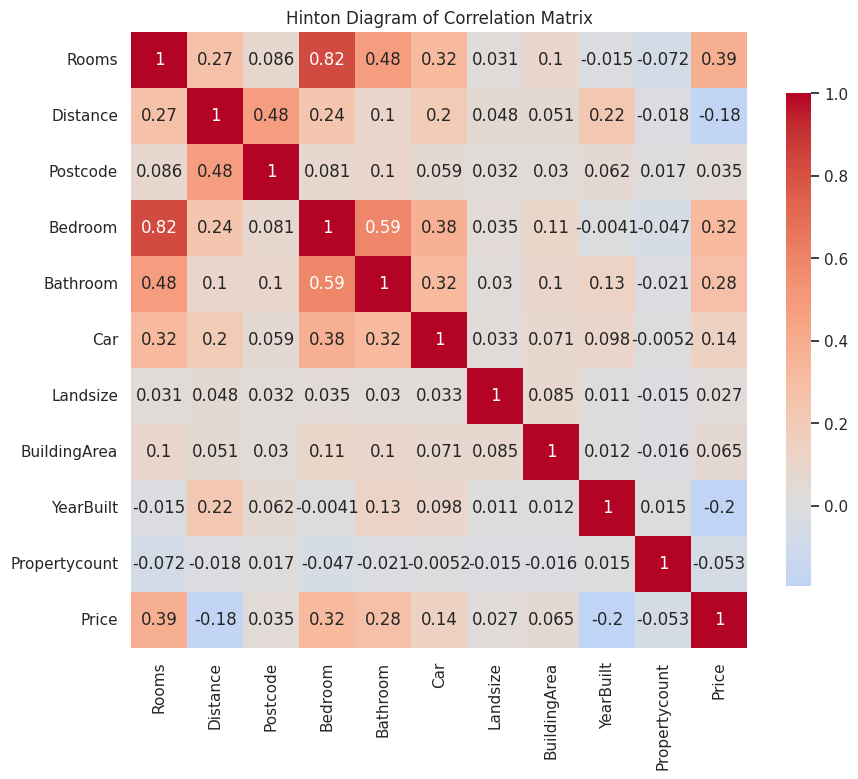

In [46]:
# Step 4: Hinton Diagram
plt.figure(figsize=(10, 8))
plt.title('Hinton Diagram of Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})
plt.show()

In [ ]:
'''
Few insights:

 1. Typically, properties with more bedrooms and bathrooms tend to have higher prices.
 This correlation indicates that larger homes, which can accommodate more occupants,
 are more desirable in the market.

 2. A negative correlation between distance and price indicates that, as the distance
from a central point (like the city center or CBD) increases, the property prices tend to decrease.

3. There is often a positive correlation between the land size of a property and its price.
Larger plots of land can be more desirable, particularly in suburban areas where outdoor space is valued.

4. The number of rooms in a property is usually positively correlated with the building area.
More rooms typically mean a larger building area, as each room requires a certain amount of space.
'''

### PCA

Standardize the Data: Normalize your numerical variables to have a mean of 0 and a standard deviation of 1.

Compute PCA: Use PCA to reduce the dimensionality of your data while retaining as much variability as possible.

Visualize the Results: Plot the explained variance ratios and the PCA components.

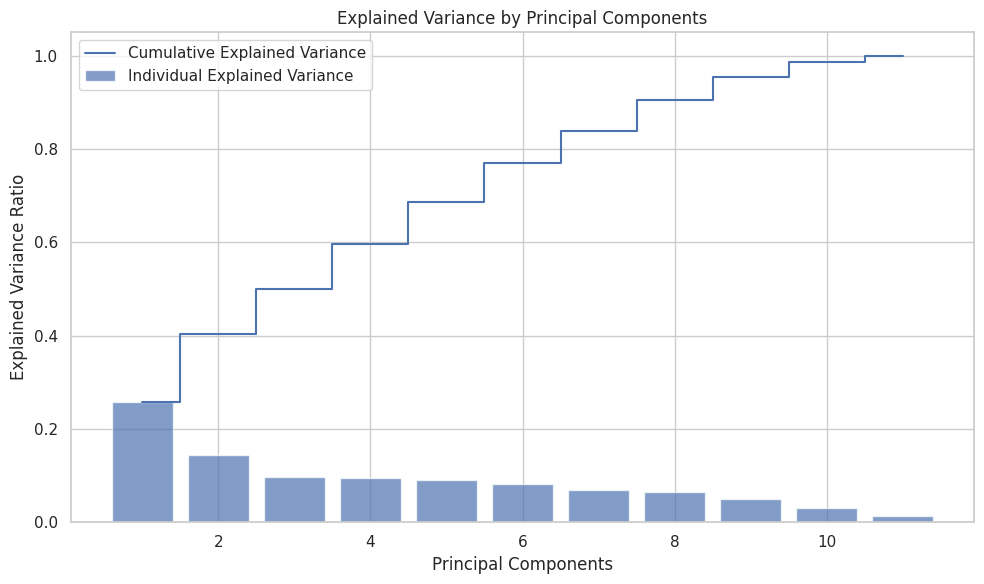

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Create a new DataFrame with the numerical columns
X = df[numerical_cols].dropna()  # Drop rows with missing values

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute PCA
pca = PCA(n_components=len(numerical_cols))  # You can adjust the number of components
X_pca = pca.fit_transform(X_scaled)

# Step 4: Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [52]:

# Step 5: PCA Components
# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(len(numerical_cols))])
pca_df.head()  # Display the first few rows of the PCA results

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.100648,0.668803,-0.520902,1.148245,-1.348259,0.317561,-1.357720,-0.527908,-0.300024,0.401004,0.029148
1,-2.467815,-1.561341,1.992023,-2.299398,-0.268032,0.280523,-0.230628,-0.072620,0.774343,-0.188100,-0.039292
2,-0.335749,-0.068470,-0.467803,0.705347,-1.486786,0.066891,-1.382767,-0.231555,0.159084,-0.330545,-0.069058
3,1.786156,-2.003711,0.667451,-0.143333,-0.667296,0.069531,1.640644,1.886137,-0.152207,0.149351,-0.773690
4,-0.288716,0.844743,-0.729594,1.413479,-1.029998,0.345452,-1.081906,-0.912216,-0.125778,0.364982,-0.035461
